### **Task 1**
Loan Prediction


*   Import necessary libraries
*   Load Data

*   Perform Data Preprocessing

*   Plotting Graphs

*   Train Test Split

*   Model Fitting

*   Model Evaluation
*   Prediction on live Data









In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [7]:
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

In [8]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [9]:
df['Dependents'].replace(to_replace='3+', value=4, inplace=True)

In [10]:
median = df['Dependents'].median()
df['Dependents'].fillna(value=median, inplace=True)

In [11]:
mean = df['LoanAmount'].mean()
df['LoanAmount'].fillna(value=mean, inplace=True)

In [12]:
mean = df['Loan_Amount_Term'].mean()
df['Loan_Amount_Term'].fillna(value=mean, inplace=True)

In [13]:
median = df['Credit_History'].median()
df['Credit_History'].fillna(value=median, inplace=True)

In [14]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
df['Gender'].replace(to_replace='Male', value=0, inplace=True)
df['Gender'].replace(to_replace='Female', value=1, inplace=True)

In [16]:
df['Education'].replace(to_replace='Graduate', value=0, inplace=True)
df['Education'].replace(to_replace='Not Graduate', value=1, inplace=True)

In [17]:
df['Self_Employed'].replace(to_replace='Yes', value=1, inplace=True)
df['Self_Employed'].replace(to_replace='No', value=0, inplace=True)

In [18]:
df['Property_Area'].replace(to_replace='Rural', value=0, inplace=True)
df['Property_Area'].replace(to_replace='Semiurban', value=1, inplace=True)
df['Property_Area'].replace(to_replace='Urban', value=2, inplace=True)

In [19]:
df['Loan_Status'].replace(to_replace='Y', value=1, inplace=True)
df['Loan_Status'].replace(to_replace='N', value=0, inplace=True)

In [20]:
df['Married'].replace(to_replace='Yes', value=1, inplace=True)
df['Married'].replace(to_replace='No', value=0, inplace=True)

In [21]:
df = df.drop(['Loan_ID'],axis=1)

In [22]:
display(df)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,0,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,0,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,0,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,0,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,0,1,4,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,0,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,0,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [23]:
df.corr()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,-0.364569,-0.045364,0.000525,-0.058809,-0.082912,-0.107930,0.073567,-0.009170,0.025752,-0.017987
Married,-0.364569,1.000000,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.010938,0.004257,0.091478
Education,-0.045364,0.012304,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.073658,-0.065243,-0.085884
Self_Employed,0.000525,0.004489,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.001550,-0.030860,-0.003700
ApplicantIncome,-0.058809,0.051708,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.018615,-0.009500,-0.004710
CoapplicantIncome,-0.082912,0.075948,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,0.011134,0.010522,-0.059187
LoanAmount,-0.107930,0.147141,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,0.073567,-0.100863,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.000432,-0.077620,-0.020974
Credit_History,-0.009170,0.010938,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,0.000432,1.000000,0.001963,0.540556
Property_Area,0.025752,0.004257,-0.065243,-0.030860,-0.009500,0.010522,-0.044776,-0.077620,0.001963,1.000000,0.032112


In [24]:
X = df.drop(['Loan_Status'],axis=1)
y = df['Loan_Status']

In [25]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,0,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,0,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,0,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,0,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
610,0,1,4,0,0,4106,0.0,40.000000,180.0,1.0,0
611,0,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2
612,0,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2


In [26]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [27]:
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

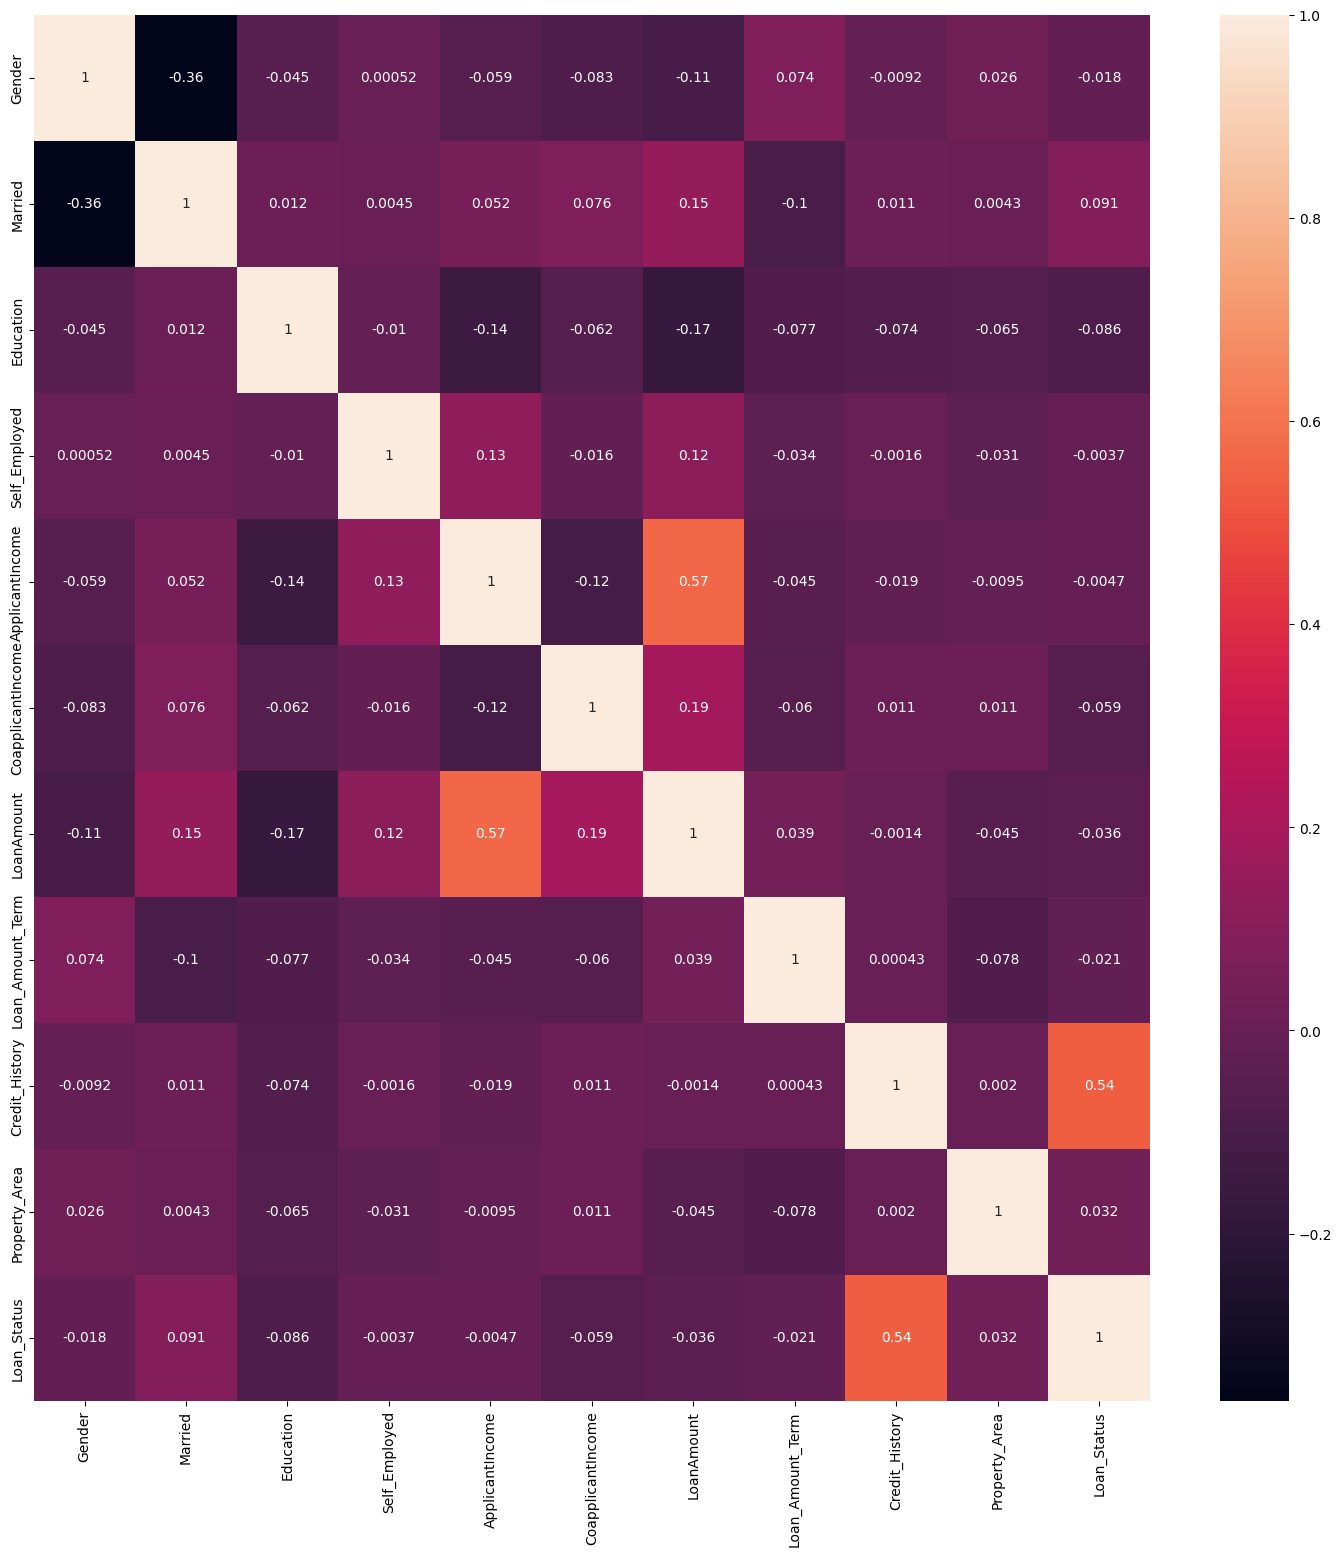

In [28]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), annot=True)
plt.show()

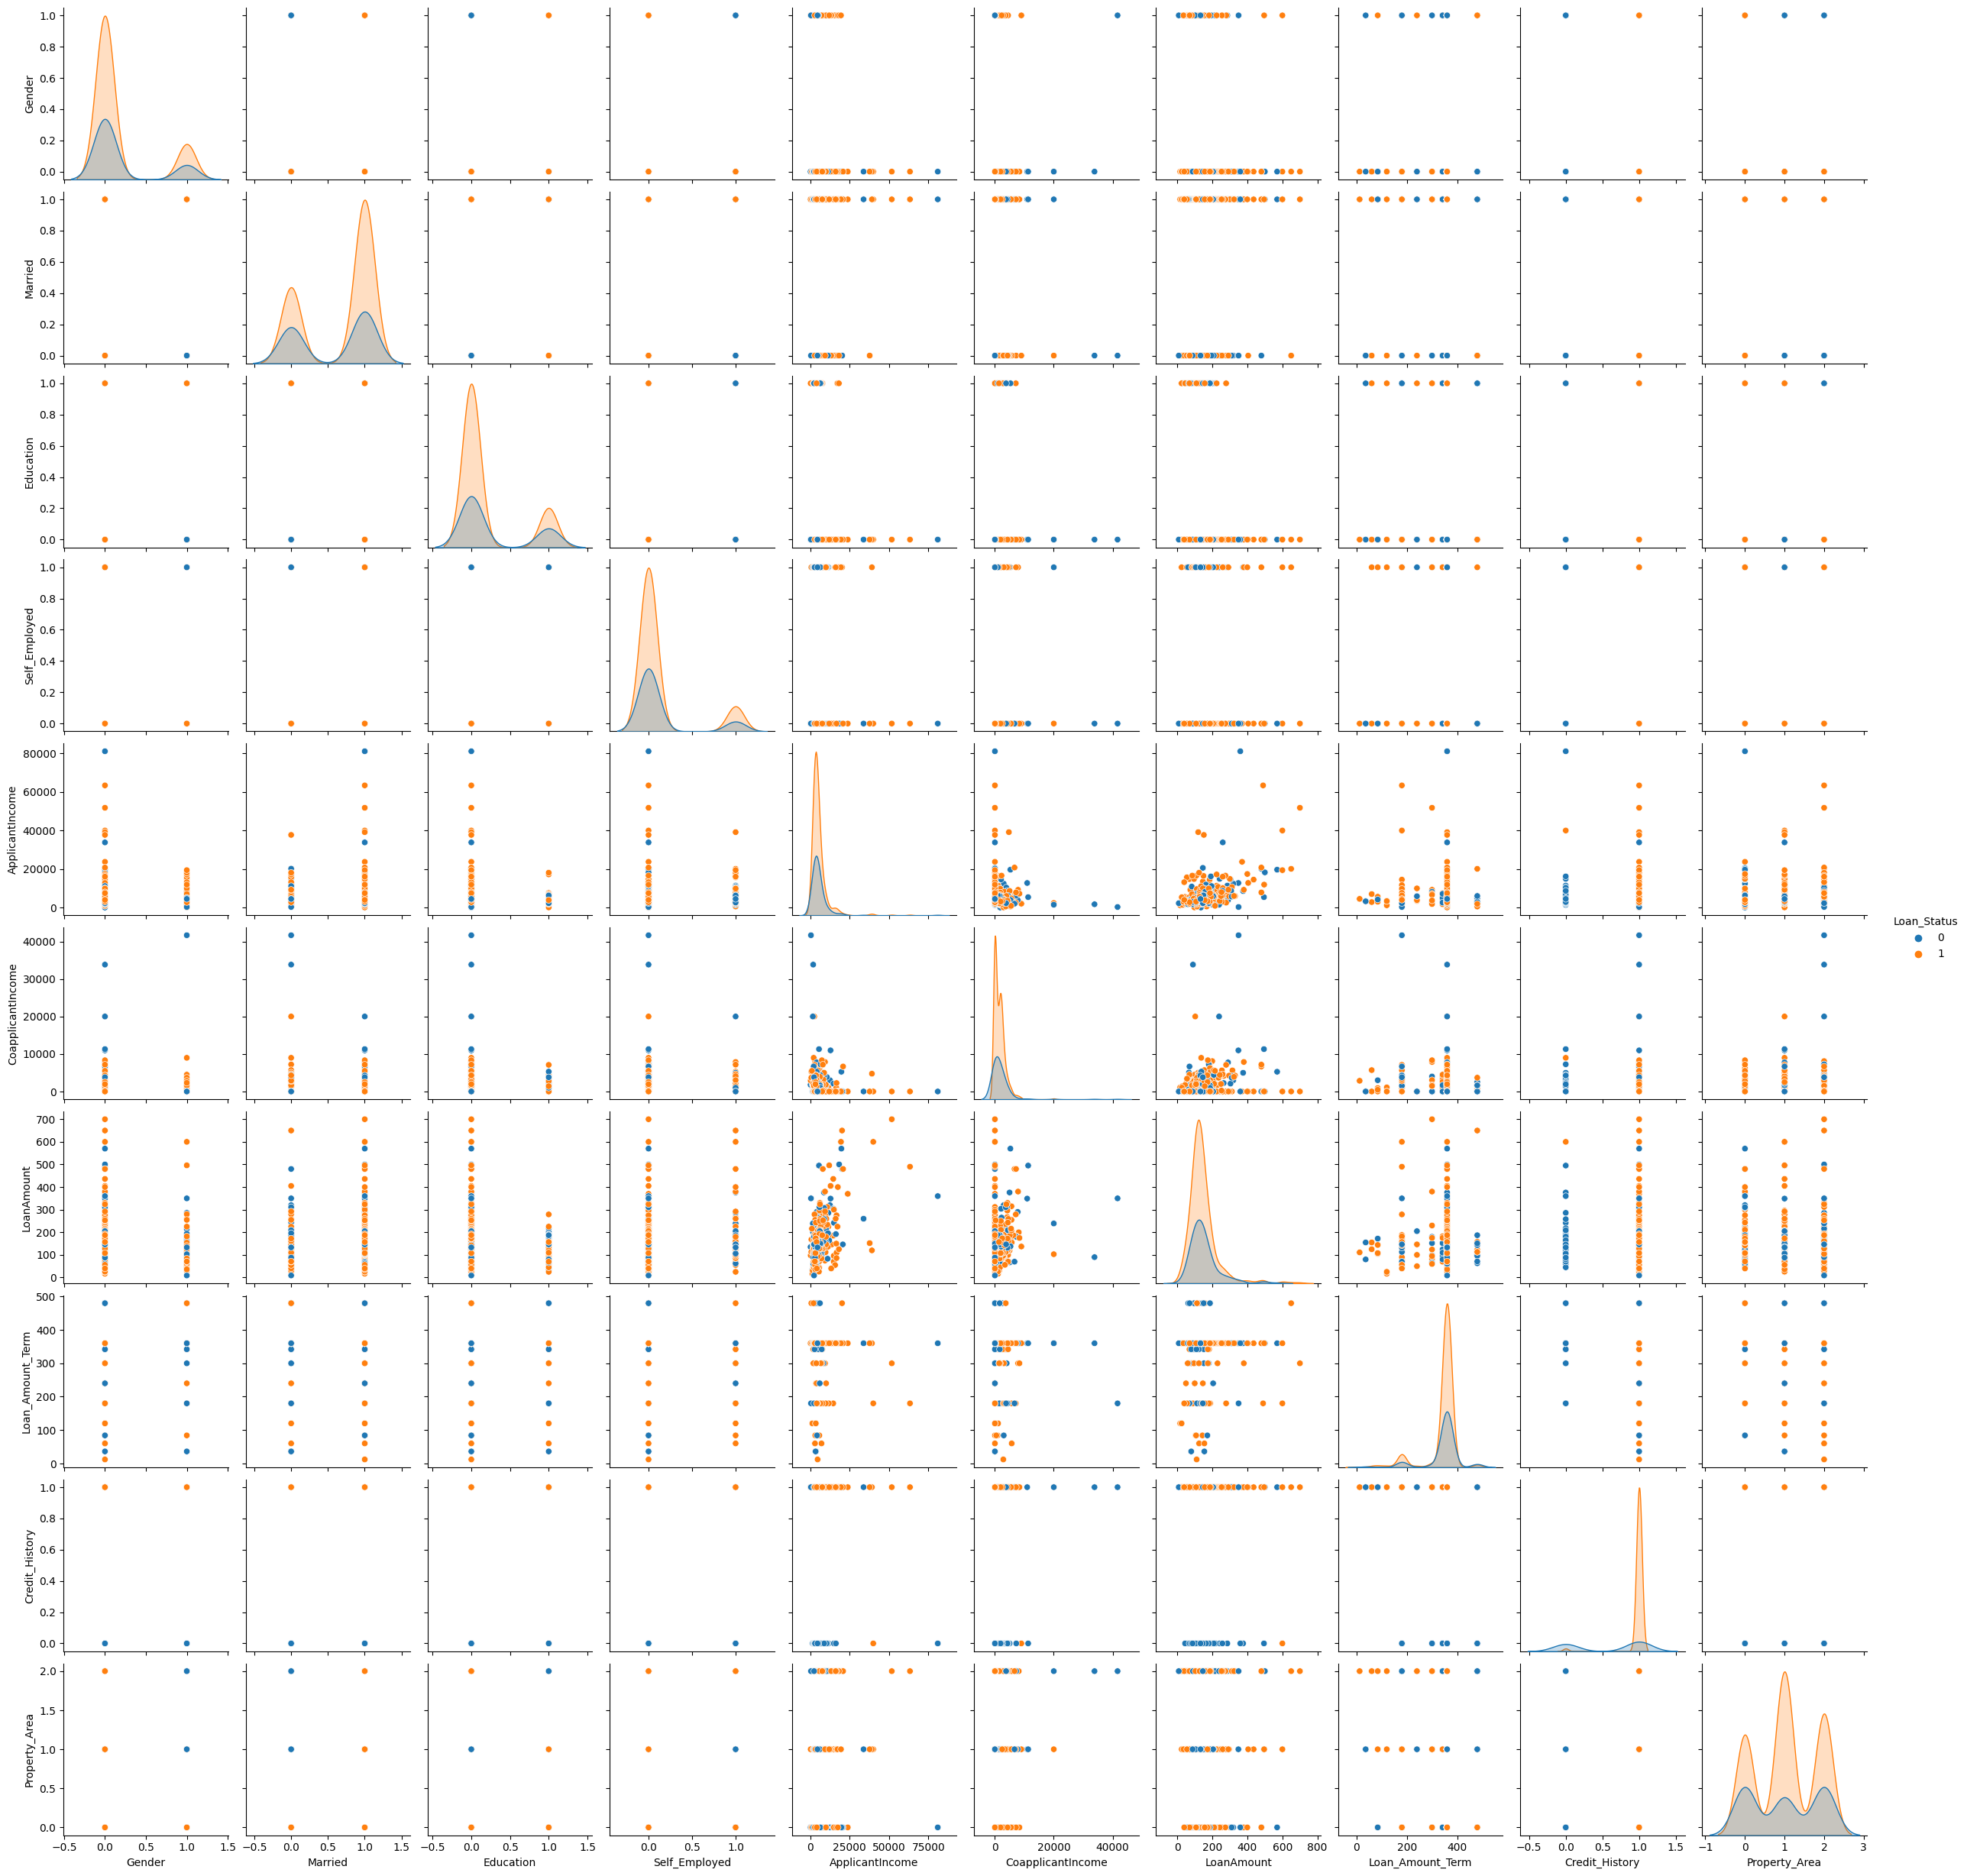

In [29]:
sns.pairplot(data=df, hue='Loan_Status')
plt.show()

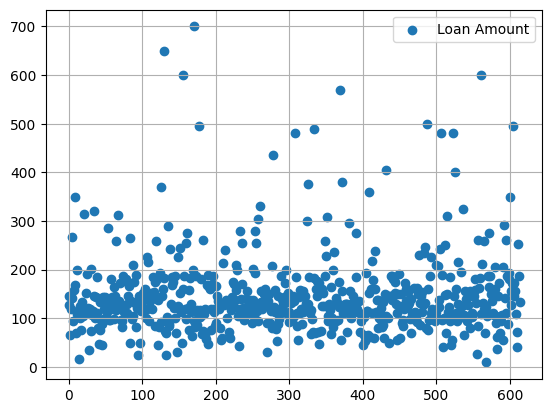

In [30]:
plt.scatter (range (len(df)), list (df['LoanAmount']), label='Loan Amount')
plt.legend ()
plt.grid ()
plt.show ()

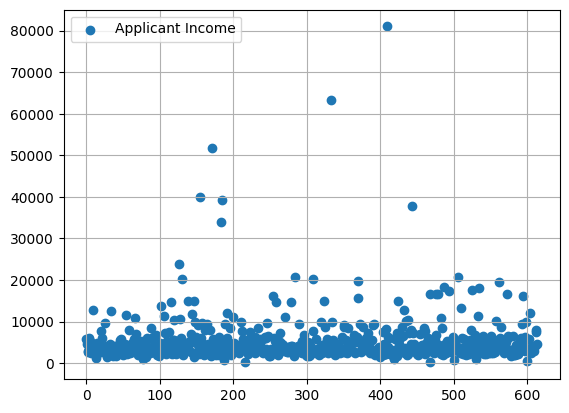

In [31]:
plt.scatter (range (len(df)), list (df['ApplicantIncome']), label='Applicant Income')
plt.legend ()
plt.grid ()
plt.show ()

In [32]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train,X_test,Y_train,Y_test

(     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
 83        0        1          0          0              0             6000   
 90        0        1          0          0              0             2958   
 227       0        1          2          0              0             6250   
 482       0        1          0          0              0             2083   
 464       0        0          0          0              0             4166   
 ..      ...      ...        ...        ...            ...              ...   
 71        0        1          2          1              1             1875   
 106       0        1          2          0              0            11417   
 270       1        0          0          0              0             3237   
 435       1        1        0.0          0              0            10047   
 102       0        1        0.0          0              0            13650   
 
      CoapplicantIncome  LoanAmount  Loan_Amount_T

In [33]:
svc = SVC (kernel="linear")
svc.fit (X_train, Y_train)
y_pred = svc.predict (X_test)
print("Accuracy Score :- ",accuracy_score (Y_test, y_pred))
print("Confusion Matrix :- ",confusion_matrix(Y_test,y_pred))
print("Classification report :- \n",classification_report(Y_test,y_pred))

Accuracy Score :-  0.7642276422764228
Confusion Matrix :-  [[14 29]
 [ 0 80]]
Classification report :- 
               precision    recall  f1-score   support

           0       1.00      0.33      0.49        43
           1       0.73      1.00      0.85        80

    accuracy                           0.76       123
   macro avg       0.87      0.66      0.67       123
weighted avg       0.83      0.76      0.72       123



In [34]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
y_pred = lr.predict (X_test)
print("Accuracy Score :- ",accuracy_score (Y_test, y_pred))
print("Confusion Matrix :- ",confusion_matrix(Y_test,y_pred))
print("Classification report :- \n",classification_report(Y_test,y_pred))

Accuracy Score :-  0.7886178861788617
Confusion Matrix :-  [[18 25]
 [ 1 79]]
Classification report :- 
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [35]:
svc = SVC (kernel="rbf")
svc.fit (X_train, Y_train)
y_pred = svc.predict (X_test)
print("Accuracy Score :- ",accuracy_score (Y_test, y_pred))
print("Confusion Matrix :- ",confusion_matrix(Y_test,y_pred))
print("Classification report :- \n",classification_report(Y_test,y_pred))

Accuracy Score :-  0.6504065040650406
Confusion Matrix :-  [[ 0 43]
 [ 0 80]]
Classification report :- 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.65      1.00      0.79        80

    accuracy                           0.65       123
   macro avg       0.33      0.50      0.39       123
weighted avg       0.42      0.65      0.51       123



In [36]:
svc = SVC (kernel="poly")
svc.fit (X_train, Y_train)
y_pred = svc.predict (X_test)
accuracy_score (Y_test, y_pred)
print("Accuracy Score :- ",accuracy_score (Y_test, y_pred))
print("Confusion Matrix :- ",confusion_matrix(Y_test,y_pred))
print("Classification report :- \n",classification_report(Y_test,y_pred))

Accuracy Score :-  0.6504065040650406
Confusion Matrix :-  [[ 0 43]
 [ 0 80]]
Classification report :- 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.65      1.00      0.79        80

    accuracy                           0.65       123
   macro avg       0.33      0.50      0.39       123
weighted avg       0.42      0.65      0.51       123



In [37]:
from sklearn.preprocessing import StandardScaler    
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train, Y_train)  
y_pred = classifier.predict(X_test)  
print("Accuracy Score :- ",accuracy_score (Y_test, y_pred))
print("Confusion Matrix :- ",confusion_matrix(Y_test,y_pred))
print("Classification report :- \n",classification_report(Y_test,y_pred))

Accuracy Score :-  0.7886178861788617
Confusion Matrix :-  [[19 24]
 [ 2 78]]
Classification report :- 
               precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.76      0.97      0.86        80

    accuracy                           0.79       123
   macro avg       0.83      0.71      0.73       123
weighted avg       0.81      0.79      0.77       123



In [38]:
test = pd.read_csv('test.csv')
test = test.drop(['Loan_ID'],axis=1)
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [39]:
test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])
test['Married'] = test['Married'].fillna(test['Married'].mode()[0])
test['Self_Employed'] = test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])

In [40]:
test['Dependents'].replace(to_replace='3+', value=4, inplace=True)

In [41]:
median = test['Dependents'].median()
test['Dependents'].fillna(value=median, inplace=True)

In [42]:
mean = test['LoanAmount'].mean()
test['LoanAmount'].fillna(value=mean, inplace=True)

In [43]:
median = test['Loan_Amount_Term'].median()
test['Loan_Amount_Term'].fillna(value=median, inplace=True)

In [44]:
median = test['Credit_History'].median()
test['Credit_History'].fillna(value=median, inplace=True)

In [45]:
test['Gender'].replace(to_replace='Male', value=0, inplace=True)
test['Gender'].replace(to_replace='Female', value=1, inplace=True)

In [46]:
test['Education'].replace(to_replace='Graduate', value=0, inplace=True)
test['Education'].replace(to_replace='Not Graduate', value=1, inplace=True)

In [47]:
test['Self_Employed'].replace(to_replace='Yes', value=1, inplace=True)
test['Self_Employed'].replace(to_replace='No', value=0, inplace=True)

In [48]:
test['Married'].replace(to_replace='Yes', value=1, inplace=True)
test['Married'].replace(to_replace='No', value=0, inplace=True)

In [49]:
test['Property_Area'].replace(to_replace='Rural', value=0, inplace=True)
test['Property_Area'].replace(to_replace='Semiurban', value=1, inplace=True)
test['Property_Area'].replace(to_replace='Urban', value=2, inplace=True)

In [50]:
test.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [51]:
display(test)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,0,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,0,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,0,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,0,0,0,1,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
362,0,1,4,1,1,4009,1777,113.0,360.0,1.0,2
363,0,1,0,0,0,4158,709,115.0,360.0,1.0,2
364,0,0,0,0,0,3250,1993,126.0,360.0,1.0,1
365,0,1,0,0,0,5000,2393,158.0,360.0,1.0,0


In [52]:
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression()

In [53]:
y_pred= lr.predict(test)

In [54]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [55]:
ytest = pd.DataFrame({'Loan Prediction':y_pred})
display(ytest)

,Loan Prediction
0,1
1,1
2,1
3,1
4,1
...,...
362,1
363,1
364,1
365,1


In [56]:
ytest['Loan Prediction'].replace(to_replace=1, value='Y', inplace=True)
ytest['Loan Prediction'].replace(to_replace=0, value='N', inplace=True)
display(ytest)

,Loan Prediction
0,Y
1,Y
2,Y
3,Y
4,Y
...,...
362,Y
363,Y
364,Y
365,Y


In [57]:
ytest.value_counts()

Loan Prediction
Y                  309
N                   58
dtype: int64